## Import Library

In [1]:
from google.colab import drive
drive.mount('/content/drive' , force_remount = True)

Mounted at /content/drive


In [2]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import random
from tqdm import tqdm
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn import pipeline
from sklearn.feature_selection import SelectKBest, f_regression, f_classif, chi2, SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from scipy.stats import pearsonr
from sklearn.metrics import confusion_matrix, classification_report, silhouette_score
from sklearn.svm import SVR, LinearSVR, SVC, LinearSVC
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.kernel_approximation import Nystroem
from sklearn.linear_model import SGDClassifier, SGDRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from scipy import stats
from keras.layers import Dense
from keras.models import Sequential
from sklearn.metrics import plot_confusion_matrix, auc
from sklearn.impute import SimpleImputer
import math
from math import sqrt

## Factor of Change in One Indicator vs Factor of Change in Other Indicator

In [ ]:
def readDataAndGetSateData():
  #combined_data = pickle.load(open('/content/drive/MyDrive/Scripts_and_Data_Transfer/5.ADI_Analysis/final_data/combined_data_temporary_unverified_pop.pickle','rb'))

  # in mtp Drive 
  #combined_data = pickle.load(open('/content/drive/MyDrive/final_data/combined_data_temporary_unverified_pop.pickle','rb'))
  #drop rows where atleast one column value in Nan or not there

  # now use only for future purpose has all combined data with different population
  combined_data = pickle.load(open('/content/drive/MyDrive/final_data/combined_data_final_different_population.pickle','rb'))

  combined_data = combined_data.dropna()

  combined_data["STATE_CODE_2011"] = combined_data["STATE_CODE_2011"].astype(np.int64)
  combined_data["DIST_CODE_2011"] = combined_data["DIST_CODE_2011"].astype(np.int64)
  combined_data["STATE_CODE_2001"] = combined_data["STATE_CODE_2001"].astype(np.int64)
  combined_data["DIST_CODE_2001"] = combined_data["DIST_CODE_2001"].astype(np.int64)

 

  return combined_data
  

In [ ]:
combined_data = readDataAndGetSateData()

In [ ]:
combined_data.dtypes

BF_2011                                     int64
FC_2011                                     int64
MSW_2011                                    int64
ASSET_2011                                  int64
2001_cc_code                                int64
ADI_2011                                    int64
BF_2001                                   float64
FC_2001                                   float64
MSW_2001                                  float64
ASSET_2001                                float64
VILL_CODE_2001                             object
DIST_CODE_2001                              int64
VILL_CODE_2011                             object
DIST_CODE_2011                              int64
STATE_CODE_2001                             int64
STATE_CODE_2011                             int64
ADI_2001                                  float64
distance_district_centre                  float64
dc_score_none_none_old                    float64
inverted_dist                             float64


In [ ]:
year1 = '2001'
year2 = '2011'
combined_data['Change_In_BF_'+year1+'_'+year2] = combined_data['BF_'+year2] - combined_data['BF_'+year1];
combined_data['Change_In_MSW_'+year1+'_'+year2] = combined_data['MSW_'+year2] - combined_data['MSW_'+year1];
combined_data['Change_In_FC_'+year1+'_'+year2] = combined_data['FC_'+year2] - combined_data['FC_'+year1];



In [ ]:
combined_data

,BF_2011,FC_2011,MSW_2011,ASSET_2011,2001_cc_code,ADI_2011,BF_2001,FC_2001,MSW_2001,ASSET_2001,VILL_CODE_2001,DIST_CODE_2001,VILL_CODE_2011,DIST_CODE_2011,STATE_CODE_2001,STATE_CODE_2011,ADI_2001,distance_district_centre,dc_score_none_none_old,inverted_dist,inverted_dist_and_std_scalar,total_population_2001,total_population_2011,ADI_2019,ASSET_2019,MSW_2019,FC_2019,BF_2019,rate_of_population_growth_2001_to_2011,total_population_2019,Change_In_BF_2001_2011,Change_In_MSW_2001_2011,Change_In_FC_2001_2011
2011_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
27378,1,1,3,3,301000100000500,8,1.0,1.0,2.0,1.0,00000500,1,27378,35,3,3,5.0,6.111495,0.407427,0.163626,0.407427,766.0,852.0,7.0,2.0,3.0,1.0,1.0,0.112272,947.0,0.0,1.0,0.0
27379,1,1,3,3,301000100000600,8,1.0,1.0,1.0,2.0,00000600,1,27379,35,3,3,5.0,4.878376,0.658831,0.204986,0.658831,730.0,780.0,10.0,2.0,3.0,3.0,2.0,0.068493,833.0,0.0,2.0,0.0
27380,1,1,3,3,301000100000700,8,1.0,1.0,1.0,1.0,00000700,1,27380,35,3,3,4.0,9.103092,0.080571,0.109853,0.080571,2104.0,2502.0,7.0,2.0,3.0,1.0,1.0,0.189163,2975.0,0.0,2.0,0.0
27381,1,1,3,3,301000100000800,8,1.0,1.0,1.0,2.0,00000800,1,27381,35,3,3,5.0,6.777262,0.309724,0.147552,0.309724,3014.0,1887.0,11.0,2.0,3.0,3.0,3.0,-0.373922,1181.0,0.0,2.0,0.0
27382,1,1,3,3,301000100000900,8,1.0,1.0,2.0,2.0,00000900,1,27382,35,3,3,6.0,6.786058,0.308561,0.147361,0.308561,461.0,2233.0,10.0,2.0,3.0,3.0,2.0,3.843818,10816.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644661,1,3,3,3,3310000700779700,10,1.0,3.0,3.0,3.0,00779700,10,644661,633,33,33,10.0,2.643310,1.712385,0.378314,1.712385,1365.0,1291.0,7.0,2.0,3.0,1.0,1.0,-0.054212,1221.0,0.0,0.0,0.0
644682,3,3,3,3,3310000700781800,12,1.0,3.0,3.0,3.0,00781800,10,644682,633,33,33,10.0,2.493440,1.850601,0.401052,1.850601,2054.0,8089.0,9.0,2.0,3.0,3.0,1.0,2.938169,31855.0,2.0,0.0,0.0
644683,3,3,3,3,3310000700781900,12,3.0,3.0,3.0,3.0,00781900,10,644683,633,33,33,12.0,3.325585,1.240612,0.300699,1.240612,2388.0,3992.0,9.0,2.0,3.0,3.0,1.0,0.671692,6673.0,0.0,0.0,0.0


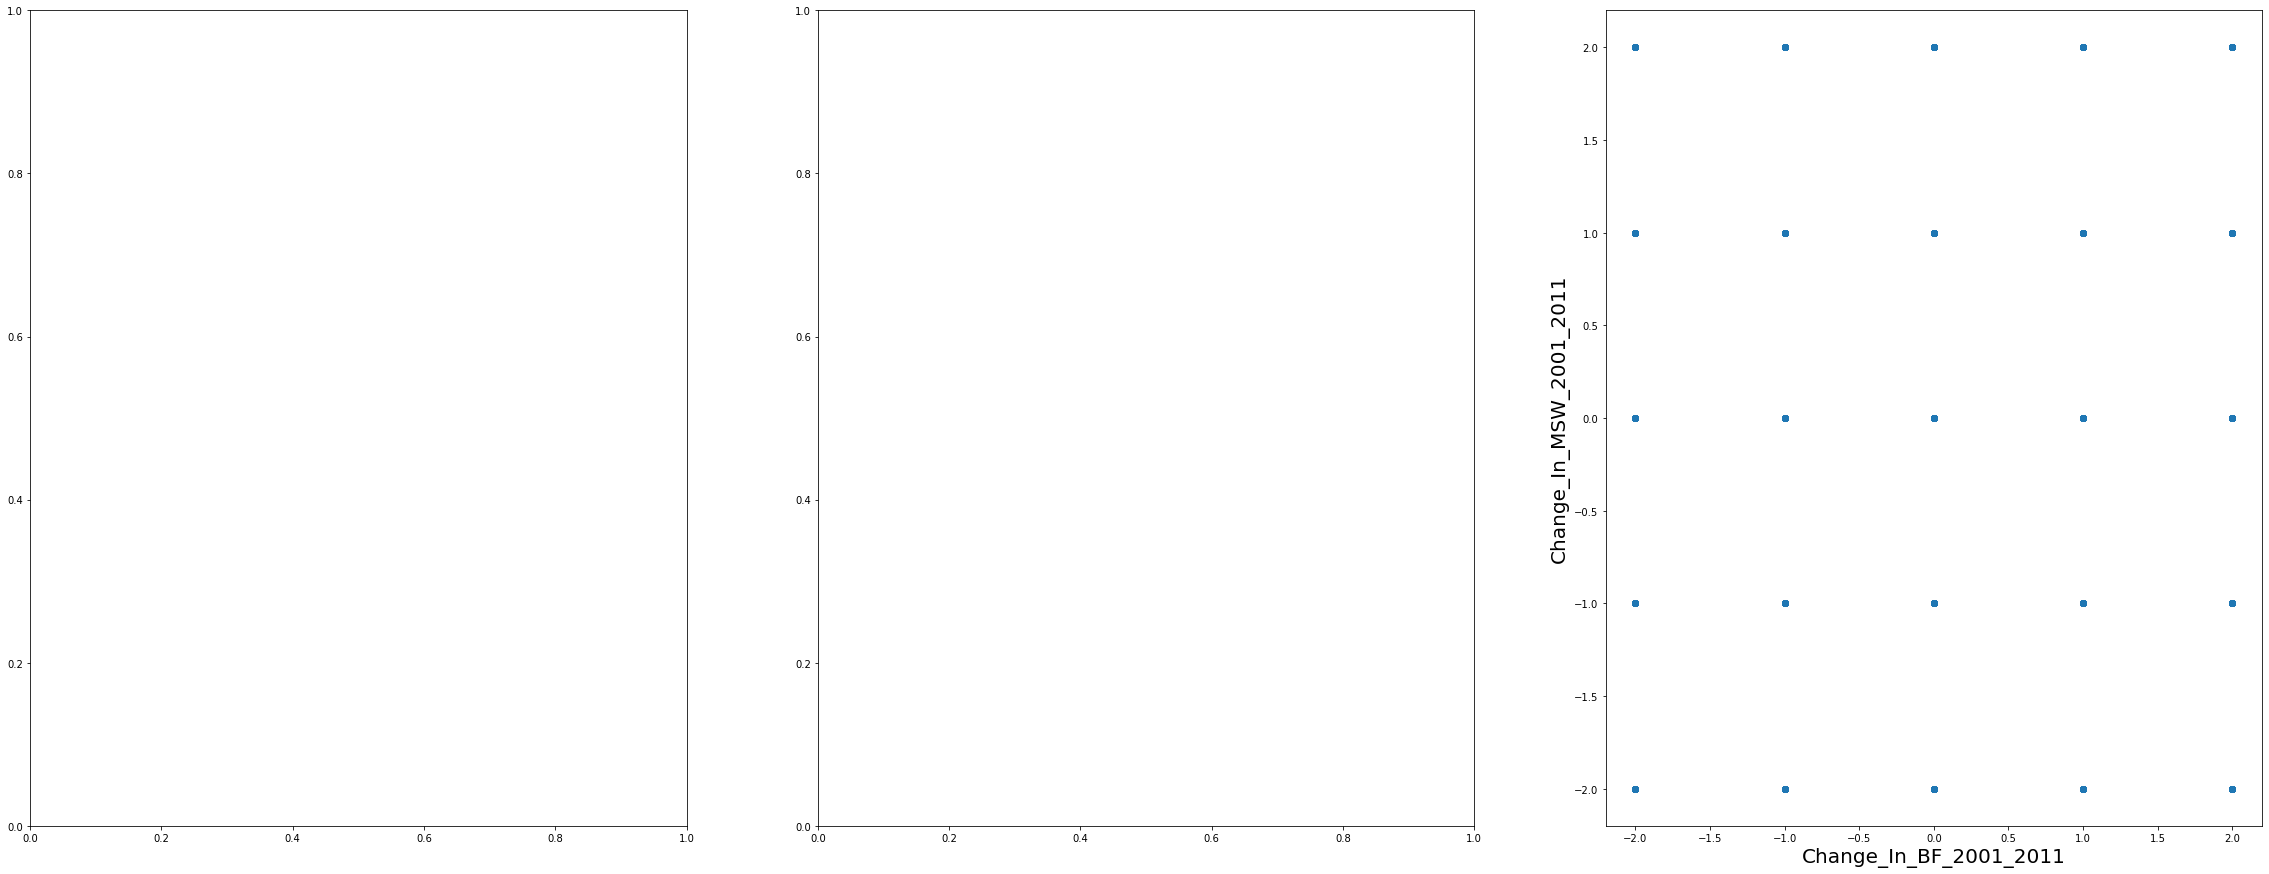

In [ ]:
x = combined_data['Change_In_BF_'+year1+'_'+year2]
y = combined_data['Change_In_MSW_'+year1+'_'+year2]


fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(40,15))

#pd.Series(combined_data['Change_In_BF_'+year1+'_'+year2]).plot(ax=ax[0],kind="bar",title='Change_In_BF_'+year1+'_'+year2) 
#pd.Series(combined_data['Change_In_MSW_'+year1+'_'+year2]).plot(ax=ax[1],kind="bar",title=combined_data['Change_In_MSW_'+year1+'_'+year2]) 

ax[2].scatter(x,y)
plt.xlabel('Change_In_BF_'+year1+'_'+year2 , fontsize=20)
plt.ylabel('Change_In_MSW_'+year1+'_'+year2 , fontsize=20)

plt.show()

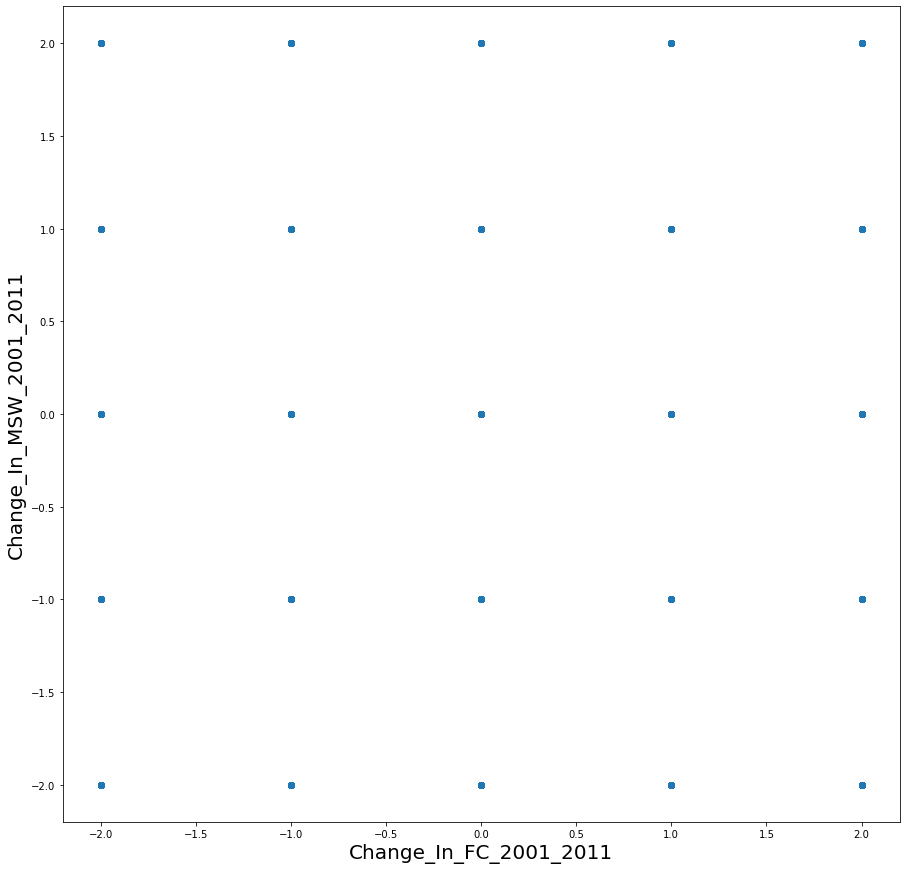

In [ ]:
x = combined_data['Change_In_FC_'+year1+'_'+year2]
y = combined_data['Change_In_MSW_'+year1+'_'+year2]
fig, ax = plt.subplots(figsize=(15,15))
ax.scatter(x,y)
plt.xlabel('Change_In_FC_'+year1+'_'+year2 , fontsize=20)
plt.ylabel('Change_In_MSW_'+year1+'_'+year2 , fontsize=20)
#plt.savefig(plt_dir+'s_'+str(int(index[0]))+'_d_'+str(int(index[1]))+'.png')
plt.show()

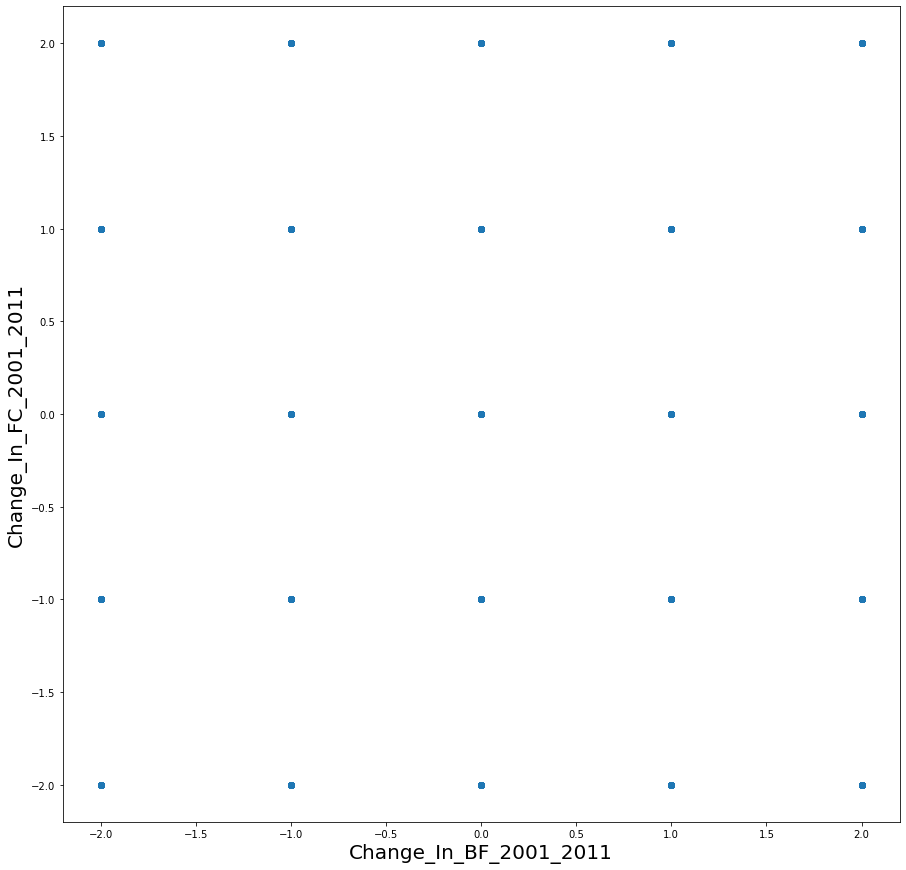

In [ ]:
x = combined_data['Change_In_BF_'+year1+'_'+year2]
y = combined_data['Change_In_FC_'+year1+'_'+year2]
fig, ax = plt.subplots(figsize=(15,15))
ax.scatter(x,y)
plt.xlabel('Change_In_BF_'+year1+'_'+year2 , fontsize=20)
plt.ylabel('Change_In_FC_'+year1+'_'+year2 , fontsize=20)
#plt.savefig(plt_dir+'s_'+str(int(index[0]))+'_d_'+str(int(index[1]))+'.png')
plt.show()

#Trial

In [ ]:
combined_df = combined_data.copy()

In [ ]:
combined_df.columns

Index(['BF_2011', 'FC_2011', 'MSW_2011', 'ASSET_2011', '2001_cc_code',
       'ADI_2011', 'BF_2001', 'FC_2001', 'MSW_2001', 'ASSET_2001',
       'VILL_CODE_2001', 'DIST_CODE_2001', 'VILL_CODE_2011', 'DIST_CODE_2011',
       'STATE_CODE_2001', 'STATE_CODE_2011', 'ADI_2001',
       'distance_district_centre', 'dc_score_none_none_old', 'inverted_dist',
       'inverted_dist_and_std_scalar', 'total_population_2001',
       'total_population_2011', 'ADI_2019', 'ASSET_2019', 'MSW_2019',
       'FC_2019', 'BF_2019', 'rate_of_population_growth_2001_to_2011',
       'total_population_2019', 'Change_In_BF_2001_2011',
       'Change_In_MSW_2001_2011', 'Change_In_FC_2001_2011'],
      dtype='object')

In [ ]:
def computeChange(combined_df, *ind) :
  year1 = '2001'
  year2 = '2011'
  year3 = '2019'

  for ele in ind:
    combined_df['Change_'+ele+'_'+year1+'_'+year2] = combined_df[ele+'_'+year2] - combined_df[ele+'_'+year1];
    combined_df['Change_'+ele+'_'+year2+'_'+year3] = combined_df[ele+'_'+year3] - combined_df[ele+'_'+year2];

  return combined_df
  

In [ ]:
combined_df = computeChange(combined_df, 'ASSET', 'MSW', 'FC', 'BF')

In [ ]:
# combined_df[combined_df['Change_In_MSW_2001_2011'] > 0]

In [ ]:
def countVillagesLevelWise(combined_df, ind) :
  finalLvl_1 = []
  finalLvl_2 = []
  finalLvl_3 = []
  tot_len = len(combined_df)
  for year in ['2001', '2011', '2019'] : 
    finalLvl_1.append(len(combined_df[combined_df[ind+'_'+year] == 1])*100/tot_len)
    finalLvl_2.append(len(combined_df[combined_df[ind+'_'+year] == 2])*100/tot_len)
    finalLvl_3.append(len(combined_df[combined_df[ind+'_'+year] == 3])*100/tot_len)

  return (np.array(finalLvl_1), np.array(finalLvl_2), np.array(finalLvl_3))

def barplot_stats(combined_df, ind) : 
  fig = plt.figure(figsize = (8, 6))
  x = ['2001', '2011', '2019']
  y1, y2, y3 = countVillagesLevelWise(combined_df, ind)

  # y1 = np.array([10, 20, 10, 30])    
  # plot bars in stack manner
  plt.bar(x, y1, color='c')
  plt.bar(x, y2, bottom=y1, color='y')
  plt.bar(x, y3, bottom=y1+y2, color='b')
  # plt.bar(x, y4, bottom=y1+y2+y3, color='g')
  plt.xlabel("Year", fontsize=15)
  plt.ylabel("Percentage of Villages", fontsize=15)
  plt.legend(["Level 1", "Level 2", "Level 3"])
  plt.title(ind + " Year wise Level Distribution", fontsize=15)
  plt.show()

In [ ]:
# barplot_stats(combined_df, 'ASSET')

In [ ]:
def change_countVillagesLevelWise(combined_df, ind) :
  finalLvl_1 = []
  finalLvl_2 = []
  finalLvl_3 = []
  finalLvl_4 = []
  finalLvl_5 = []

  tot_len = len(combined_df)
  for year in ['2001', '2011'] :
    if year == '2001' :
      year2 = '2011'
    else :
      year2 = '2019' 
    finalLvl_1.append(len(combined_df[combined_df['Change_'+ind+'_'+year+'_'+year2] == -2])*100/tot_len)
    finalLvl_2.append(len(combined_df[combined_df['Change_'+ind+'_'+year+'_'+year2] == -1])*100/tot_len)
    finalLvl_3.append(len(combined_df[combined_df['Change_'+ind+'_'+year+'_'+year2] == 0])*100/tot_len)
    finalLvl_4.append(len(combined_df[combined_df['Change_'+ind+'_'+year+'_'+year2] == 1])*100/tot_len)
    finalLvl_5.append(len(combined_df[combined_df['Change_'+ind+'_'+year+'_'+year2] == 2])*100/tot_len)

  return (np.array(finalLvl_1), np.array(finalLvl_2), np.array(finalLvl_3), np.array(finalLvl_4), np.array(finalLvl_5))

def change_barplot_stats(combined_df, ind) : 
  fig = plt.figure(figsize = (5, 6))
  x = ['2001_2011', '2011_2019']
  y1, y2, y3, y4, y5 = change_countVillagesLevelWise(combined_df, ind)

  # y1 = np.array([10, 20, 10, 30])    
  # plot bars in stack manner
  plt.bar(x, y1, color='yellow')
  plt.bar(x, y2, bottom=y1, color='lime')
  plt.bar(x, y3, bottom=y1+y2, color='cyan')
  plt.bar(x, y4, bottom=y1+y2+y3, color='darkcyan')
  plt.bar(x, y5, bottom=y1+y2+y3+y4, color='darkslategrey')


  plt.xlabel("Year range", fontsize=15)
  plt.ylabel("Percentage of Villages", fontsize=15)
  plt.legend(["change -2", "change -1", "change 0",  "change 1",  "change 2"])
  plt.title(ind + " Year range wise change", fontsize=15)
  # ax.set_xticklabels(fontsize = 5)
  # plt.yticks(fontsize = 8)
  plt.show()

In [ ]:
# change_barplot_stats(combined_df, 'MSW')

In [ ]:
# change_barplot_stats(combined_df, 'ASSET')

In [ ]:
def change_table(combined_df, ind1, ind2, year1, absolute = 0):
  change_list = [-2, -1, 0, 1, 2]
  # ind1 = 'ASSET'
  # ind2 = 'MSW'
  final_count_list = []
  final_percent_list = []
  if year1 == '2001':
    col_name1 = 'Change_'+ind1+'_'+year1+'_2011'
    col_name2 = 'Change_'+ind2+'_'+year1+'_2011'
  else : 
    col_name1 = 'Change_'+ind1+'_'+year1+'_2019'
    col_name2 = 'Change_'+ind2+'_'+year1+'_2019'

  len1 = len(combined_df)
  for ind1_lvl in change_list :
    temp_df = combined_df[combined_df[col_name1] == ind1_lvl]
    if absolute == 0:
      len1 = len(temp_df)
    percent_list, count_list = [], []
    for ind2_lvl in change_list :
      len2 = len(temp_df[temp_df[col_name2] == ind2_lvl])
      percent_list.append(round(len2*100/len1, 2))
      count_list.append(len2)
    final_count_list.append(count_list)
    final_percent_list.append(percent_list)
  final_df = pd.DataFrame(data = np.array(final_percent_list), index = change_list, columns = change_list)
  return final_df

In [ ]:
# change_table(combined_df, 'MSW', 'ASSET', '2001')

In [ ]:
# change_table(combined_df, 'ASSET', 'MSW', '2011')

In [ ]:
# change_table(combined_df, 'ASSET', 'MSW', '2011', 1)

In [ ]:
def returnTemp_df(combined_df, col_name, ind_lvl):
  if ind_lvl == '-ve_change' :
    return combined_df[combined_df[col_name] < 0]
  elif ind_lvl == 'no_change' :
    return combined_df[combined_df[col_name] == 0]
  else  :
    return combined_df[combined_df[col_name] > 0]

def change_table_bins(combined_df, ind1, ind2, year1, absolute=0):
  change_list = ['-ve_change', 'no_change', '+ve_change']
  # ind1 = 'ASSET'
  # ind2 = 'MSW'
  final_count_list = []
  final_percent_list = []
  if year1 == '2001':
    col_name1 = 'Change_'+ind1+'_'+year1+'_2011'
    col_name2 = 'Change_'+ind2+'_'+year1+'_2011'
  else : 
    col_name1 = 'Change_'+ind1+'_'+year1+'_2019'
    col_name2 = 'Change_'+ind2+'_'+year1+'_2019'

  len1 = len(combined_df)

  for ind1_lvl in change_list :

    temp_df = returnTemp_df(combined_df, col_name1, ind1_lvl)
    if absolute == 0 :
      len1 = len(temp_df)
    percent_list, count_list = [], []
    for ind2_lvl in change_list :
      len2 = len(returnTemp_df(temp_df, col_name2, ind2_lvl))
      percent_list.append(round(len2*100/len1, 2))
      count_list.append(len2)
    final_count_list.append(count_list)
    final_percent_list.append(percent_list)

  ind_list = list(map(lambda x: ind1 + '_' + x, change_list))
  col_list = list(map(lambda x: ind2 + '_' + x, change_list))

  final_df = pd.DataFrame(data = np.array(final_percent_list), index = ind_list, columns = col_list)
  
  if absolute == 1 :
    final_df['Total'] = final_df.sum(axis=1)
    sum_row = final_df.sum(axis=0)

    final_df.loc["Total"] = sum_row
  # final_df = final_df.rename_axis(ind1)
  # final_df = final_df.rename_axis(ind2, axis="columns")
  return final_df

In [ ]:
# change_table_bins(combined_df, 'ASSET', 'MSW', '2001')

In [ ]:
# change_table_bins(combined_df, 'ASSET', 'MSW', '2011')

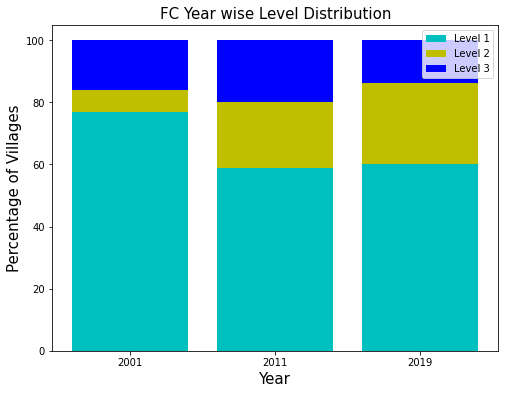

In [ ]:
barplot_stats(combined_df, 'FC')

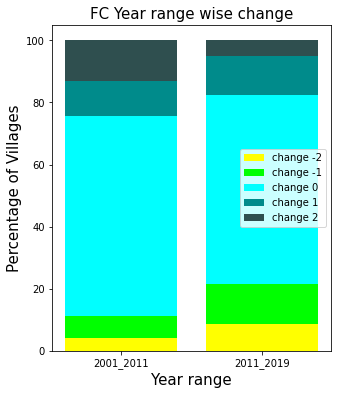

In [ ]:
change_barplot_stats(combined_df, 'FC')

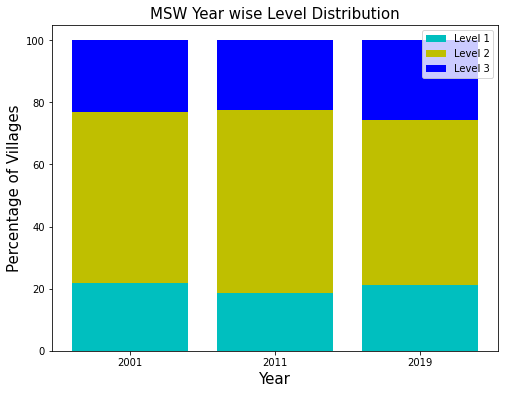

In [ ]:
barplot_stats(combined_df, 'MSW')

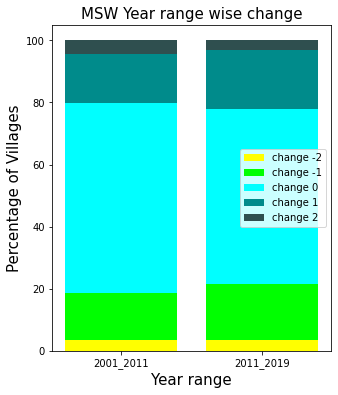

In [ ]:
change_barplot_stats(combined_df, 'MSW')

In [ ]:
# change_table(combined_df, 'ASSET', 'MSW', '2001')
in1 = 'FC'
in2 = 'MSW'
in3 = 'ASSET'
in4 = 'BF'

In [ ]:
# print(change_table(combined_df, in1, in2, '2001', 1))
change_table_bins(combined_df, in1, in2, '2001', 1)

,MSW_-ve_change,MSW_no_change,MSW_+ve_change,Total
FC_-ve_change,2.61,6.88,1.78,11.27
FC_no_change,12.14,39.15,12.92,64.21
FC_+ve_change,3.91,15.04,5.57,24.52
Total,18.66,61.07,20.27,100.00


In [ ]:
change_table_bins(combined_df, in1, in2, '2011', 1)

,MSW_-ve_change,MSW_no_change,MSW_+ve_change,Total
FC_-ve_change,4.91,12.56,4.14,21.61
FC_no_change,14.25,33.41,13.21,60.87
FC_+ve_change,2.30,10.40,4.82,17.52
Total,21.46,56.37,22.17,100.00


In [ ]:
change_table_bins(combined_df, in1, in2, '2001')

,MSW_-ve_change,MSW_no_change,MSW_+ve_change
FC_-ve_change,23.19,61.05,15.76
FC_no_change,18.91,60.96,20.13
FC_+ve_change,15.94,61.35,22.71


In [ ]:
change_table_bins(combined_df, in1, in2, '2011')

,MSW_-ve_change,MSW_no_change,MSW_+ve_change
FC_-ve_change,22.72,58.12,19.16
FC_no_change,23.41,54.89,21.70
FC_+ve_change,13.11,59.35,27.54


In [ ]:
change_table_bins(combined_df, in1, in3, '2001')

,ASSET_-ve_change,ASSET_no_change,ASSET_+ve_change
FC_-ve_change,29.81,58.12,12.07
FC_no_change,21.93,61.82,16.26
FC_+ve_change,15.72,54.56,29.72


In [ ]:
change_table_bins(combined_df, in1, in3, '2011')

,ASSET_-ve_change,ASSET_no_change,ASSET_+ve_change
FC_-ve_change,31.33,50.98,17.68
FC_no_change,19.74,43.39,36.87
FC_+ve_change,21.44,52.14,26.42


In [ ]:
change_table_bins(combined_df, in1, in4, '2011', 1)

,BF_-ve_change,BF_no_change,BF_+ve_change,Total
FC_-ve_change,4.96,15.84,0.82,21.62
FC_no_change,7.48,50.76,2.63,60.87
FC_+ve_change,1.86,13.43,2.23,17.52
Total,14.30,80.03,5.68,100.01


In [ ]:
change_table_bins(combined_df, in1, in4, '2001')

,BF_-ve_change,BF_no_change,BF_+ve_change
FC_-ve_change,18.63,65.77,15.59
FC_no_change,5.10,82.13,12.77
FC_+ve_change,4.95,72.29,22.75


In [ ]:
change_table_bins(combined_df, in1, in4, '2011')

,BF_-ve_change,BF_no_change,BF_+ve_change
FC_-ve_change,22.94,73.29,3.77
FC_no_change,12.29,83.39,4.32
FC_+ve_change,10.59,76.67,12.74


In [ ]:
change_table(combined_df, in1, in2, '2001')

,-2,-1,0,1,2
-2,4.76,18.34,60.90,14.51,1.49
-1,1.96,21.29,61.14,13.46,2.16
0,4.00,14.91,60.96,15.74,4.38
1,1.77,15.98,62.60,16.33,3.32
2,2.33,12.01,60.25,17.57,7.85


In [ ]:
change_table(combined_df, in1, in2, '2011')

,-2,-1,0,1,2
-2,8.49,21.64,49.86,16.62,3.38
-1,2.02,15.81,63.55,16.84,1.78
0,3.78,19.63,54.89,18.22,3.48
1,0.40,13.02,62.24,22.78,1.55
2,1.53,10.82,52.36,28.74,6.55


#BF

In [ ]:
# change_table(combined_df, 'ASSET', 'MSW', '2001')
in1 = 'BF'
in2 = 'MSW'
in3 = 'ASSET'
in4 = 'FC'

In [ ]:
change_table_bins(combined_df, in1, in2, '2001')

,MSW_-ve_change,MSW_no_change,MSW_+ve_change
BF_-ve_change,32.31,54.23,13.47
BF_no_change,18.10,62.81,19.09
BF_+ve_change,15.74,55.23,29.03


In [ ]:
change_table_bins(combined_df, in1, in2, '2011')

,MSW_-ve_change,MSW_no_change,MSW_+ve_change
BF_-ve_change,29.38,52.04,18.58
BF_no_change,20.79,57.56,21.65
BF_+ve_change,10.90,50.50,38.60


In [ ]:
change_table_bins(combined_df, in1, in3, '2001')

,ASSET_-ve_change,ASSET_no_change,ASSET_+ve_change
BF_-ve_change,37.35,54.50,8.15
BF_no_change,22.14,62.21,15.65
BF_+ve_change,10.23,48.83,40.94


In [ ]:
change_table_bins(combined_df, in1, in3, '2011')

,ASSET_-ve_change,ASSET_no_change,ASSET_+ve_change
BF_-ve_change,47.23,39.17,13.60
BF_no_change,17.10,48.11,34.79
BF_+ve_change,37.10,43.37,19.53


In [ ]:
change_table_bins(combined_df, in1, in4, '2001')

,FC_-ve_change,FC_no_change,FC_+ve_change
BF_-ve_change,31.88,49.68,18.44
BF_no_change,9.52,67.72,22.76
BF_+ve_change,11.31,52.78,35.91


In [ ]:
change_table_bins(combined_df, in1, in4, '2011')

,FC_-ve_change,FC_no_change,FC_+ve_change
BF_-ve_change,34.69,52.33,12.98
BF_no_change,19.79,63.42,16.79
BF_+ve_change,14.37,46.32,39.31


In [ ]:
change_table_bins(combined_df, in1, in4, '2011', 1)

,FC_-ve_change,FC_no_change,FC_+ve_change,Total
BF_-ve_change,4.96,7.48,1.86,14.30
BF_no_change,15.84,50.76,13.43,80.03
BF_+ve_change,0.82,2.63,2.23,5.68
Total,21.62,60.87,17.52,100.01


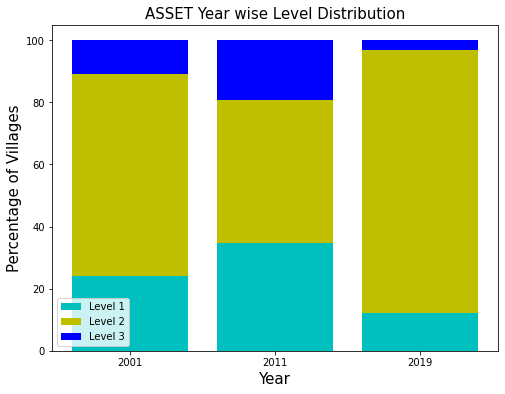

In [ ]:
barplot_stats(combined_df, 'ASSET')

#MSW

In [ ]:
# change_table(combined_df, 'ASSET', 'MSW', '2001')
in1 = 'MSW'
in2 = 'BF'
in3 = 'ASSET'
in4 = 'FC'

In [ ]:
change_table_bins(combined_df, in1, in2, '2001')

,BF_-ve_change,BF_no_change,BF_+ve_change
MSW_-ve_change,11.40,75.50,13.10
MSW_no_change,5.85,80.10,14.05
MSW_+ve_change,4.38,73.37,22.25


In [ ]:
change_table_bins(combined_df, in1, in2, '2011')

,BF_-ve_change,BF_no_change,BF_+ve_change
MSW_-ve_change,19.57,77.55,2.88
MSW_no_change,13.20,81.72,5.09
MSW_+ve_change,11.97,78.14,9.88


In [ ]:
change_table_bins(combined_df, in1, in3, '2001')

,ASSET_-ve_change,ASSET_no_change,ASSET_+ve_change
MSW_-ve_change,29.56,55.64,14.80
MSW_no_change,19.95,61.96,18.09
MSW_+ve_change,17.72,56.24,26.04


In [ ]:
change_table_bins(combined_df, in1, in3, '2011')

,ASSET_-ve_change,ASSET_no_change,ASSET_+ve_change
MSW_-ve_change,23.64,42.58,33.78
MSW_no_change,20.47,48.95,30.58
MSW_+ve_change,26.74,44.36,28.90


In [ ]:
change_table_bins(combined_df, in1, in3, '201', 1)

,ASSET_-ve_change,ASSET_no_change,ASSET_+ve_change,Total
MSW_-ve_change,5.07,9.14,7.25,21.46
MSW_no_change,11.54,27.59,17.24,56.37
MSW_+ve_change,5.93,9.84,6.41,22.18
Total,22.54,46.57,30.90,100.01


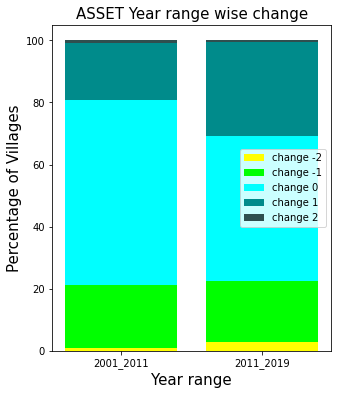

In [ ]:
change_barplot_stats(combined_df, 'ASSET')

In [ ]:
change_table_bins(combined_df, in1, in4, '2001')

,FC_-ve_change,FC_no_change,FC_+ve_change
MSW_-ve_change,14.00,65.06,20.94
MSW_no_change,11.27,64.10,24.63
MSW_+ve_change,8.76,63.77,27.47


In [ ]:
change_table_bins(combined_df, in1, in4, '2011')

,FC_-ve_change,FC_no_change,FC_+ve_change
MSW_-ve_change,22.88,66.41,10.71
MSW_no_change,22.29,59.27,18.45
MSW_+ve_change,18.68,59.56,21.76


In [ ]:
#ASSET

In [ ]:
# change_table(combined_df, 'ASSET', 'MSW', '2001')
in1 = 'ASSET'
in2 = 'BF'
in3 = 'MSW'
in4 = 'FC'

In [ ]:
change_table_bins(combined_df, in1, in2, '2001')

,BF_-ve_change,BF_no_change,BF_+ve_change
ASSET_-ve_change,11.55,80.98,7.46
ASSET_no_change,6.02,81.25,12.72
ASSET_+ve_change,2.81,63.86,33.32


In [ ]:
change_table_bins(combined_df, in1, in2, '2011')

,BF_-ve_change,BF_no_change,BF_+ve_change
ASSET_-ve_change,29.94,60.72,9.34
ASSET_no_change,12.02,82.69,5.29
ASSET_+ve_change,6.29,90.12,3.59


In [ ]:
change_table_bins(combined_df, in1, in3, '2001')

,MSW_-ve_change,MSW_no_change,MSW_+ve_change
ASSET_-ve_change,25.91,57.22,16.87
ASSET_no_change,17.42,63.46,19.12
ASSET_+ve_change,14.48,57.87,27.65


In [ ]:
change_table_bins(combined_df, in1, in3, '2001')

,MSW_-ve_change,MSW_no_change,MSW_+ve_change
ASSET_-ve_change,25.91,57.22,16.87
ASSET_no_change,17.42,63.46,19.12
ASSET_+ve_change,14.48,57.87,27.65


In [ ]:
change_table_bins(combined_df, in1, in4, '2001')

,FC_-ve_change,FC_no_change,FC_+ve_change
ASSET_-ve_change,15.78,66.12,18.10
ASSET_no_change,10.99,66.58,22.44
ASSET_+ve_change,7.12,54.70,38.17


In [ ]:
change_table_bins(combined_df, in1, in4, '2011')

,FC_-ve_change,FC_no_change,FC_+ve_change
ASSET_-ve_change,30.04,53.29,16.66
ASSET_no_change,23.67,56.72,19.62
ASSET_+ve_change,12.37,72.64,14.98


#Absolute tables

In [ ]:
# change_table(combined_df, 'ASSET', 'MSW', '2001')
in1 = 'FC'
in2 = 'BF'
in3 = 'MSW'
in4 = 'ASSET'

In [ ]:
change_table_bins(combined_df, in1, in2, '2001', 1)

NameError: ignored

In [ ]:
change_table_bins(combined_df, in1, in2, '2011', 1)

In [ ]:
change_table_bins(combined_df, in1, in3, '2001', 1)

In [ ]:
change_table_bins(combined_df, in1, in3, '2011', 1)

In [ ]:
change_table_bins(combined_df, in1, in4, '2001', 1)

In [ ]:
change_table_bins(combined_df, in1, in4, '2011', 1)

In [ ]:
change_table_bins(combined_df, in2, in3, '2001', 1)

In [ ]:
change_table_bins(combined_df, in2, in3, '2011', 1)

In [ ]:
change_table_bins(combined_df, in2, in4, '2001', 1)

In [ ]:
change_table_bins(combined_df, in2, in4, '2011', 1)

In [ ]:
change_table_bins(combined_df, in3, in4, '2001', 1)

In [ ]:
change_table_bins(combined_df, in3, in4, '2011', 1)

In [ ]:
def returnTemp_df(combined_df, col_name, ind_lvl):
  if ind_lvl == '-ve_change' :
    return combined_df[combined_df[col_name] < 0]
  elif ind_lvl == 'no_change' :
    return combined_df[combined_df[col_name] == 0]
  else  :
    return combined_df[combined_df[col_name] > 0]

def indGrowthStats(combined_df, ind1, year1):
  change_list = ['-ve_change', 'no_change', '+ve_change']
  # ind1 = 'ASSET'
  # ind2 = 'MSW'
  final_count_list = []
  final_percent_list = []
  if year1 == '2001':
    col_name1 = 'Change_'+ind1+'_'+year1+'_2011'
    col_name2 = 'Change_'+ind2+'_'+year1+'_2011'
  else : 
    col_name1 = 'Change_'+ind1+'_'+year1+'_2019'
    col_name2 = 'Change_'+ind2+'_'+year1+'_2019'

  len1 = len(combined_df)

  for ind1_lvl in change_list :

    temp_df = returnTemp_df(combined_df, col_name1, ind1_lvl)
    if absolute == 0 :
      len1 = len(temp_df)
    percent_list, count_list = [], []
    for ind2_lvl in change_list :
      len2 = len(returnTemp_df(temp_df, col_name2, ind2_lvl))
      percent_list.append(round(len2*100/len1, 2))
      count_list.append(len2)
    final_count_list.append(count_list)
    final_percent_list.append(percent_list)

  ind_list = list(map(lambda x: ind1 + '_' + x, change_list))
  col_list = list(map(lambda x: ind2 + '_' + x, change_list))

  final_df = pd.DataFrame(data = np.array(final_percent_list), index = ind_list, columns = col_list)
  
  if absolute == 1 :
    final_df['Total'] = final_df.sum(axis=1)
    sum_row = final_df.sum(axis=0)

    final_df.loc["Total"] = sum_row
  # final_df = final_df.rename_axis(ind1)
  # final_df = final_df.rename_axis(ind2, axis="columns")
  return final_df

#Final Tables

In [3]:
def readDataAndGetSateData():
  #combined_data = pickle.load(open('/content/drive/MyDrive/Scripts_and_Data_Transfer/5.ADI_Analysis/final_data/combined_data_temporary_unverified_pop.pickle','rb'))

  # in mtp Drive 
  #combined_data = pickle.load(open('/content/drive/MyDrive/final_data/combined_data_temporary_unverified_pop.pickle','rb'))
  #drop rows where atleast one column value in Nan or not there

  # now use only for future purpose has all combined data with different population
  new_df = pickle.load(open('/content/drive/MyDrive/Scripts_and_Data_Transfer/Latest_script_Data_for_hyothesis_testing_March_02_2022/final_combined_without_temporal_correction_arch2_predicted_ADI_for_2001_2019_ground_truth_ADI_2011_variables_predicted_from_arch2_pop_sc_st_lit_village_data.pkl', 'rb'))
  old_df = pickle.load(open('/content/drive/MyDrive/final_data/combined_data_final_different_population.pickle','rb'))
  combined_data = new_df.copy()[old_df.columns]

  combined_data = combined_data.dropna()

  combined_data["STATE_CODE_2011"] = combined_data["STATE_CODE_2011"].astype(np.int64)
  combined_data["DIST_CODE_2011"] = combined_data["DIST_CODE_2011"].astype(np.int64)
  combined_data["STATE_CODE_2001"] = combined_data["STATE_CODE_2001"].astype(np.int64)
  combined_data["DIST_CODE_2001"] = combined_data["DIST_CODE_2001"].astype(np.int64)

 

  return combined_data



In [4]:
  combined_data = readDataAndGetSateData()
  combined_df = combined_data.copy()
  len(combined_data)

305457

In [5]:
def computeChange(combined_df, *ind) :
  year1 = '2001'
  year2 = '2011'
  year3 = '2019'

  for ele in ind:
    combined_df['Change_'+ele+'_'+year1+'_'+year2] = combined_df[ele+'_'+year2] - combined_df[ele+'_'+year1];
    combined_df['Change_'+ele+'_'+year2+'_'+year3] = combined_df[ele+'_'+year3] - combined_df[ele+'_'+year2];

  return combined_df


In [6]:
combined_df = computeChange(combined_df, 'ASSET', 'MSW', 'FC', 'BF')
combined_df.columns

Index(['BF_2011', 'FC_2011', 'MSW_2011', 'ASSET_2011', '2001_cc_code',
       'ADI_2011', 'BF_2001', 'FC_2001', 'MSW_2001', 'ASSET_2001',
       'VILL_CODE_2001', 'DIST_CODE_2001', 'VILL_CODE_2011', 'DIST_CODE_2011',
       'STATE_CODE_2001', 'STATE_CODE_2011', 'ADI_2001',
       'distance_district_centre', 'dc_score_none_none_old', 'inverted_dist',
       'inverted_dist_and_std_scalar', 'total_population_2001',
       'total_population_2011', 'ADI_2019', 'ASSET_2019', 'MSW_2019',
       'FC_2019', 'BF_2019', 'rate_of_population_growth_2001_to_2011',
       'total_population_2019', 'Change_ASSET_2001_2011',
       'Change_ASSET_2011_2019', 'Change_MSW_2001_2011',
       'Change_MSW_2011_2019', 'Change_FC_2001_2011', 'Change_FC_2011_2019',
       'Change_BF_2001_2011', 'Change_BF_2011_2019'],
      dtype='object')

In [7]:
## MAIN TABLE WITH ALL 3 LEVELS
# def returnTemp_df(temp_df, col_name, ind_lvl):
#   if ind_lvl == '-ve_change' :
#     return temp_df[temp_df[col_name] < 0]
#   elif ind_lvl == 'no_change' :
#     return temp_df[temp_df[col_name] == 0]
#   else  :
#     return temp_df[temp_df[col_name] > 0]

# def overall_GrowthStats(combined_df, year1):
#   change_list = ['+ve_change', '-ve_change', 'no_change']
#   lvl_list = [1, 2, 3]
#   ind_list = ['ASSET', 'BF', 'FC', 'MSW']
#   # ind1 = 'ASSET'
#   # ind2 = 'MSW'
#   total_length_list = []
#   only_positiveChange_list = []
#   pPositive = []

#   final_count_list = []
#   reqd_list = []

#   for ind in ind_list :

#     if year1 == '2001':
#       col_name = 'Change_'+ind+'_'+year1+'_2011'
#     else : 
#       col_name = 'Change_'+ind+'_'+year1+'_2019'

#     final_percent_list = []
#     length_list = []
#     positiveChange_list = []

#     for lvl in lvl_list :
#       percent = []
#       temp_df = combined_df[combined_df[ind+'_'+year1] == lvl].copy()
#       temp_len = len(temp_df)
#       length_list.append(temp_len)

#       for change in change_list :
#         change_df = returnTemp_df(temp_df, col_name, change)
#         change_len = len(change_df)
#         if change == '+ve_change' :
#           positiveChange_list.append(change_len)

#         percent.append(round(change_len/temp_len, 4))

#       final_percent_list.append(percent)

#     reqd_list.append(final_percent_list) 
#     total_length_list.append(length_list)
#     only_positiveChange_list.append(positiveChange_list)
        

  
#   return reqd_list, total_length_list, only_positiveChange_list

In [ ]:
#TABLE WITH LEVEL 3 REMOVED, -VE AND 0 CHANGE COLUMNS COMBINED and MSW REMOVED
def returnTemp_df(temp_df, col_name, ind_lvl):
  if ind_lvl == '-ve_change' :
    return temp_df[temp_df[col_name] <= 0]
  else  :
    return temp_df[temp_df[col_name] > 0]

def overall_GrowthStats(combined_df, year1):
  change_list = ['+ve_change', '-ve_change']
  lvl_list = [1, 2]
  ind_list = ['ASSET', 'BF', 'FC']
  # ind1 = 'ASSET'
  # ind2 = 'MSW'
  total_length_list = []
  only_positiveChange_list = []
  pPositive = []

  final_count_list = []
  reqd_list = []

  for ind in ind_list :

    if year1 == '2001':
      col_name = 'Change_'+ind+'_'+year1+'_2011'
    else : 
      col_name = 'Change_'+ind+'_'+year1+'_2019'

    final_percent_list = []
    length_list = []
    positiveChange_list = []

    for lvl in lvl_list :
      percent = []
      temp_df = combined_df[combined_df[ind+'_'+year1] == lvl].copy()
      temp_len = len(temp_df)
      length_list.append(temp_len)

      for change in change_list :
        change_df = returnTemp_df(temp_df, col_name, change)
        change_len = len(change_df)
        if change == '+ve_change' :
          positiveChange_list.append(change_len)

        # percent.append(round(change_len/temp_len, 4))
        percent.append(change_len/temp_len)


      final_percent_list.append(percent)

    reqd_list.append(final_percent_list) 
    total_length_list.append(length_list)
    only_positiveChange_list.append(positiveChange_list)
        

  
  return reqd_list, total_length_list, only_positiveChange_list

In [ ]:
reqdTable, totalNumberTable, positiveNumberTable = overall_GrowthStats(combined_df, '2001')

In [ ]:
np.round(np.array(reqdTable), 4).tolist()

[[[0.317, 0.683], [0.1762, 0.8238]],
 [[0.1679, 0.8321], [0.1757, 0.8243]],
 [[0.3119, 0.6881], [0.0789, 0.9211]]]

In [ ]:
totalNumberTable

[[74290, 200012], [271551, 12834], [236579, 22002]]

In [ ]:
positiveNumberTable
# [[23548, 35242, 0],
#  [45596, 2255, 0],
#  [73778, 1736, 0],
#  [37711, 24714, 0]]

[[23548, 35242], [45596, 2255], [73778, 1736]]

In [ ]:
# tem_df[tem_df['Change_FC_2001_2011'] < 0]
len(combined_df[(combined_df['ASSET_2011']==2) & (combined_df['Change_ASSET_2011_2019'] > 0)])
# 3778/141004

3778

In [ ]:
ind1 = 'asset'
ind2 = 'fc'
level = '1'
ind_dict = {'asset' : 0, 'bf' : 1, 'fc' : 2}
level_dict = {'1' : 0, '2' : 1}

a = ind_dict[ind1]
b = ind_dict[ind2]

lvl = level_dict[level]

y1 = positiveNumberTable[a][lvl]
y2 = positiveNumberTable[b][lvl]

n1 = totalNumberTable[a][lvl]
n2 = totalNumberTable[b][lvl]

p = (y1 + y2)/(n1 + n2)
p1 = reqdTable[a][lvl][0]
p2 = reqdTable[b][lvl][0]

print('n1, n2 : ', n1, n2)
print('y1, y2 : ', y1, y2)
print('p1, p2 : ', p1, p2)
print('p : ', p)


Z = (p1 - p2)/(math.sqrt((p*(1-p)*((1/n1)+(1/n2)))))
print('Z stat : ', Z)
# z = (reqdTable[0][1][0] - reqdTable[2][1][0])/sqrt(p*(1-p)*((1/n1) + (1/n2)))
# z

n1, n2 :  74290 236579
y1, y2 :  23548 73778
p1, p2 :  0.3169740207295733 0.3118535457500454
p :  0.31307721258793897
Z stat :  2.6253978441917076


In [ ]:
ind = 'ASSET'
len(combined_df[combined_df['Change_'+ind+'_2001_2011'] > 0])/len(combined_df)

0.1908698065978163

In [ ]:
#OVERALL PROBABILITY
# 2001-2011
# Asset - 0.19
# BF - 0.15
# FC - 0.24
# MSW - 0.20

#2011 - 2019
# Asset - 0.30
# BF - 0.05
# FC - 0.17
# MSW - 0.22

In [8]:
def returnTemp_df(temp_df, col_name, ind_lvl):
  if ind_lvl == '-ve_change' :
    return temp_df[temp_df[col_name] < 0]
  elif ind_lvl == 'no_change' :
    return temp_df[temp_df[col_name] == 0]
  else  :
    return temp_df[temp_df[col_name] > 0]

def overall_GrowthStats_villType(combined_df, year1, developmentRange):

  lvl_list = [1, 2]
  ind_list = ['ASSET', 'BF', 'FC', 'MSW']
  pIndWise = []

  for ele in developmentRange :
    spread = ele[1]
    temp_df = combined_df[((combined_df['ADI_'+year1] >= ele[0]) & (combined_df['ADI_'+year1] < (ele[0] + spread)))]
    tempLen = len(temp_df)

    devRangeWise = []
    for ind in ind_list :
      
      pInd = []
      if year1 == '2001':
        col_name = 'Change_'+ind+'_'+year1+'_2011'
      else : 
        col_name = 'Change_'+ind+'_'+year1+'_2019'

      for lvl in lvl_list :
        indLvl_df = temp_df[temp_df[ind+'_'+year1] == lvl]
        indLvlLen = len(indLvl_df)

        posChange_df = returnTemp_df(indLvl_df, col_name, '+ve_change')
        posChangeLen = len(posChange_df)
        # pInd.append(round(posChangeLen/indLvlLen, 4))
        pInd.append(posChangeLen/indLvlLen)


      indTotal = returnTemp_df(temp_df, col_name, '+ve_change')
      indTotalLen = len(indTotal)
      # pInd.append(round(indTotalLen/tempLen, 4))
      pInd.append(indTotalLen/tempLen)
      devRangeWise.append(pInd)

    pIndWise.append(devRangeWise)

  return pIndWise



In [11]:
# developmentRange = [(4, 2), (6, 3), (9, 4)]
# developmentRange = [(4, 3), (7, 2), (9, 4)]
developmentRange = [(5, 4), (9, 2), (11, 5)]
# developmentRange = [(4, 3), (7, 6)]
reqd_list = overall_GrowthStats_villType(combined_df, '2001', developmentRange)

ZeroDivisionError: ignored

In [22]:
ind1 = 'ASSET'
ind2 = 'BF'
year1 = '2001'


if year1 == '2001' :
  year2 = '2011'
else :
  year2 = '2019'
col_name1 = 'Change_'+ind1+'_'+year1+'_'+year2
col_name2 = 'Change_'+ind2+'_'+year1+'_'+year2

y1 = len(combined_df[combined_df[col_name1]>0])
y2 = len(combined_df[combined_df[col_name2]>0])

n1 = len(combined_df)
n2 = len(combined_df)

p1 = y1/n1
p2 = y2/n2

p = (y1 + y2)/(n1 + n2)

print('n1, n2 : ', n1, n2)
print('y1, y2 : ', y1, y2)
print('p1, p2 : ', p1, p2)
print('p : ', p)


Z = (p1 - p2)/(math.sqrt((p*(1-p)*((1/n1)+(1/n2)))))
print('Z stat : ', Z)

# len(combined_df[combined_df['Change_ASSET_2001_2011']>0])/len(combined_df)

n1, n2 :  305457 305457
y1, y2 :  52806 49250
p1, p2 :  0.1728753965369921 0.16123382341868087
p :  0.1670546099778365
Z stat :  12.196471817230835


In [ ]:
np.round(np.array(reqd_list), 5).tolist()

[[[0.31017, 0.15016, 0.21212],
  [0.13292, 0.06326, 0.13193],
  [0.29949, 0.05489, 0.29446],
  [0.54356, 0.14437, 0.27743]],
 [[0.55544, 0.20622, 0.19357],
  [0.2251, 0.09886, 0.20773],
  [0.34174, 0.07836, 0.21401],
  [0.70474, 0.1421, 0.08649]],
 [[0.61176, 0.23019, 0.07069],
  [0.35995, 0.26811, 0.14606],
  [0.48893, 0.12464, 0.06229],
  [0.91791, 0.1778, 0.10186]]]

In [ ]:
year1 = '2001'
ind = 'BF'
lvl = 2
temp1_df = combined_df[((combined_df['ADI_'+year1] >= 6) & (combined_df['ADI_'+year1] < 9))]
len(temp1_df)

173863

In [ ]:
len(temp1_df[temp1_df['Change_'+ind+'_2001_2011'] > 0])

30350

In [ ]:
indLvl1_df = temp1_df[temp1_df[ind+'_'+year1] == lvl]
print(len(indLvl1_df[indLvl1_df['Change_'+ind+'_2001_2011'] > 0]), len(indLvl1_df))

552 6126


In [ ]:
552/6126

0.0901077375122429